In [1]:
# 導入函式庫
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt


In [15]:
# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()
len(y_train)

60000

In [3]:
# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))


In [4]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [5]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 
y_TestOneHot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  
X_test_2D

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
# x_Train_norm = X_train_2D/255
# x_Test_norm = X_test_2D/255
# x_Test_norm

In [9]:
# 進行訓練, 訓練過程會存在 train_history 變數中
# train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)  
train_history = model.fit(x=X_train_2D, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)  


Epoch 1/10
60/60 - 1s - loss: 8.8506 - accuracy: 0.8116 - val_loss: 2.2416 - val_accuracy: 0.9061
Epoch 2/10
60/60 - 1s - loss: 1.5947 - accuracy: 0.9192 - val_loss: 1.4551 - val_accuracy: 0.9231
Epoch 3/10
60/60 - 1s - loss: 0.8749 - accuracy: 0.9403 - val_loss: 1.1042 - val_accuracy: 0.9354
Epoch 4/10
60/60 - 1s - loss: 0.5608 - accuracy: 0.9546 - val_loss: 1.0008 - val_accuracy: 0.9390
Epoch 5/10
60/60 - 1s - loss: 0.3656 - accuracy: 0.9648 - val_loss: 0.8746 - val_accuracy: 0.9438
Epoch 6/10
60/60 - 1s - loss: 0.2588 - accuracy: 0.9714 - val_loss: 0.8222 - val_accuracy: 0.9481
Epoch 7/10
60/60 - 1s - loss: 0.1712 - accuracy: 0.9783 - val_loss: 0.8099 - val_accuracy: 0.9478
Epoch 8/10
60/60 - 1s - loss: 0.1153 - accuracy: 0.9834 - val_loss: 0.7652 - val_accuracy: 0.9484
Epoch 9/10
60/60 - 1s - loss: 0.0882 - accuracy: 0.9859 - val_loss: 0.7803 - val_accuracy: 0.9492
Epoch 10/10
60/60 - 1s - loss: 0.0643 - accuracy: 0.9886 - val_loss: 0.7166 - val_accuracy: 0.9524


In [10]:
# 顯示訓練成果(分數)
# scores = model.evaluate(x_Test_norm, y_TestOneHot) 
scores = model.evaluate(X_test_2D, y_TestOneHot)

print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


313/313 [==============================] - 1s 1ms/step - loss: 0.6559 - accuracy: 0.9533

	[Info] Accuracy of testing data = 95.3%


In [12]:
# 預測(prediction)
# X = x_Test_norm[0:10,:]
X = X_test_2D[0:10,:]
# predictions = model.predict_classes(X)
predictions = (model.predict(X) > 0.5).astype("int32")

# get prediction result
print(predictions)


[[0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


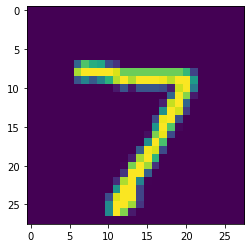

In [13]:
# 顯示 第一筆訓練資料的圖形，確認是否正確
plt.imshow(X_test[0])

plt.show() 

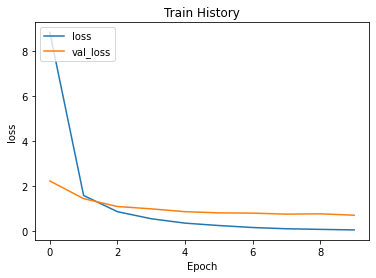

In [14]:
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 